In [15]:
# coding: utf-8
import sys
sys.path.append('../')
sys.path.append('../ch07')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq

In [17]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id) 
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 5
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 21 / 351 | 시간 10[s] | 손실 3.09
| 에폭 1 |  반복 41 / 351 | 시간 20[s] | 손실 1.90
| 에폭 1 |  반복 61 / 351 | 시간 30[s] | 손실 1.72
| 에폭 1 |  반복 81 / 351 | 시간 40[s] | 손실 1.46
| 에폭 1 |  반복 101 / 351 | 시간 50[s] | 손실 1.19
| 에폭 1 |  반복 121 / 351 | 시간 60[s] | 손실 1.14
| 에폭 1 |  반복 141 / 351 | 시간 71[s] | 손실 1.09
| 에폭 1 |  반복 161 / 351 | 시간 81[s] | 손실 1.06
| 에폭 1 |  반복 181 / 351 | 시간 91[s] | 손실 1.04
| 에폭 1 |  반복 201 / 351 | 시간 101[s] | 손실 1.03
| 에폭 1 |  반복 221 / 351 | 시간 112[s] | 손실 1.02
| 에폭 1 |  반복 241 / 351 | 시간 122[s] | 손실 1.02
| 에폭 1 |  반복 261 / 351 | 시간 132[s] | 손실 1.01
| 에폭 1 |  반복 281 / 351 | 시간 142[s] | 손실 1.00
| 에폭 1 |  반복 301 / 351 | 시간 153[s] | 손실 1.00
| 에폭 1 |  반복 321 / 351 | 시간 163[s] | 손실 1.00
| 에폭 1 |  반복 341 / 351 | 시간 173[s] | 손실 1.00
Q 10/15/94                     
T 1994-10-15
X 1978-08-11
---
Q thursday, november 13, 2008  
T 2008-11-13
X 1978-08-11
---
Q Mar 25, 2003                 
T 2003-03-25
X 1978-08-11
---
Q Tuesday, November 2

C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:203: 

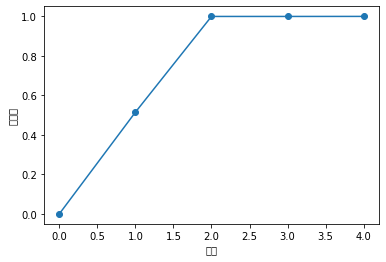

In [18]:
acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params()

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()
